In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import re, string
import random 

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag 
from PIL import Image 
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hridayashinde/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hridayashinde/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import plotly
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

In [4]:
df = pd.read_csv("ios14tweets.csv")
df = pd.DataFrame(df['Text'])
df

,Text
0,How to Install iOS 14 Beta https://t.co/VCGTJI...
1,How to Install iOS 14 Beta https://t.co/VCGTJI...
2,I wanna get the beta for iOS 14 but my insuran...
3,I’m able to download iOS 14 beta.. should I do...
4,Τεχνολογία: Regret installing the iOS 14 or iP...
...,...
996,JANGAN UPDATE IOS 14.2 BETA 2 KALAU SAYANG PHONE
997,iOS 14 public beta 2でCOVID-19接触確認使えない https://...
998,atualizei pro beta do iOS 14 e agora tá tudo b...
999,pake ios 14 pablik beta ah.


In [5]:
# Cleaning the tweets

# converting to lowercase
df['clean_text'] = df['Text'].str.lower()

# removing links,urls
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'https?:\/\/\S+', '', x, flags=re.MULTILINE))
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x, flags=re.MULTILINE))

# removing html reference characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'&[a-z]+;', '', x))

# removing user @ references and '#' from tweet
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\@\w+|\#|\d+', '', x))

# removing characters that aren't letters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#@]", '', x))

# removing all the special characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\W',' ', x))

# removing all single characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x))

# removing twitter handles
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'@mention', '', x))

df

,Text,clean_text
0,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta
1,How to Install iOS 14 Beta https://t.co/VCGTJI...,how to install ios beta
2,I wanna get the beta for iOS 14 but my insuran...,i wanna get the beta for ios but my insurance...
3,I’m able to download iOS 14 beta.. should I do...,im able to download ios beta should do it
4,Τεχνολογία: Regret installing the iOS 14 or iP...,regret installing the ios or ipados public...
...,...,...
996,JANGAN UPDATE IOS 14.2 BETA 2 KALAU SAYANG PHONE,jangan update ios beta kalau sayang phone
997,iOS 14 public beta 2でCOVID-19接触確認使えない https://...,ios public beta covid
998,atualizei pro beta do iOS 14 e agora tá tudo b...,atualizei pro beta do ios agora tudo bugado te...
999,pake ios 14 pablik beta ah.,pake ios pablik beta ah


In [6]:
# apply sentiment analysis
analyser = SentimentIntensityAnalyzer()

sentiment_score_list = []
sentiment_label_list = []

for i in df['clean_text'].values.tolist():
    sentiment_score = analyser.polarity_scores(i)

    if sentiment_score['compound'] >= 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Positive')
    elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Neutral')
    elif sentiment_score['compound'] <= -0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Negative')
    
df['sentiment'] = sentiment_label_list
df['sentiment score'] = sentiment_score_list
df = df[df['sentiment'] != 'Neutral']
df = df.reset_index(drop=True)
df

,Text,clean_text,sentiment,sentiment score
0,Τεχνολογία: Regret installing the iOS 14 or iP...,regret installing the ios or ipados public...,Negative,-0.4215
1,This iOS 14 beta fine bug wise but it’s taking...,this ios beta fine bug wise but its taking up...,Negative,-0.1280
2,@AravenaEs @joepenora @9to5mac @filipeesposito...,ios beta solved all my issues from ios ...,Negative,-0.4588
3,@SkyHelpTeam Running the public beta of iOS 14...,running the public beta of ios and found sky...,Positive,0.2500
4,Updated to iOS 14 beta. Everything is working ...,updated to ios beta everything is working fin...,Positive,0.2023
...,...,...,...,...
536,Installed iOS 14 beta on my main phone yesterd...,installed ios beta on my main phone yesterday...,Positive,0.5267
537,@NianticHelp update was pushed and still didn’...,update was pushed and still didnt fix crashin...,Negative,-0.7122
538,Do I recommend installing the new iOS 14 publi...,do recommend installing the new ios public be...,Positive,0.7717
539,atualizei pro beta do iOS 14 e agora tá tudo b...,atualizei pro beta do ios agora tudo bugado te...,Negative,-0.2960


In [7]:
# tokenise string
df['tokenise'] = df.apply(lambda row: nltk.word_tokenize(row[1]), axis=1)
df

,Text,clean_text,sentiment,sentiment score,tokenise
0,Τεχνολογία: Regret installing the iOS 14 or iP...,regret installing the ios or ipados public...,Negative,-0.4215,"[regret, installing, the, ios, or, ipados, pub..."
1,This iOS 14 beta fine bug wise but it’s taking...,this ios beta fine bug wise but its taking up...,Negative,-0.1280,"[this, ios, beta, fine, bug, wise, but, its, t..."
2,@AravenaEs @joepenora @9to5mac @filipeesposito...,ios beta solved all my issues from ios ...,Negative,-0.4588,"[ios, beta, solved, all, my, issues, from, ios..."
3,@SkyHelpTeam Running the public beta of iOS 14...,running the public beta of ios and found sky...,Positive,0.2500,"[running, the, public, beta, of, ios, and, fou..."
4,Updated to iOS 14 beta. Everything is working ...,updated to ios beta everything is working fin...,Positive,0.2023,"[updated, to, ios, beta, everything, is, worki..."
...,...,...,...,...,...
536,Installed iOS 14 beta on my main phone yesterd...,installed ios beta on my main phone yesterday...,Positive,0.5267,"[installed, ios, beta, on, my, main, phone, ye..."
537,@NianticHelp update was pushed and still didn’...,update was pushed and still didnt fix crashin...,Negative,-0.7122,"[update, was, pushed, and, still, didnt, fix, ..."
538,Do I recommend installing the new iOS 14 publi...,do recommend installing the new ios public be...,Positive,0.7717,"[do, recommend, installing, the, new, ios, pub..."
539,atualizei pro beta do iOS 14 e agora tá tudo b...,atualizei pro beta do ios agora tudo bugado te...,Negative,-0.2960,"[atualizei, pro, beta, do, ios, agora, tudo, b..."


In [8]:
# initiate nltk lemmatiser
wordnet_lemmatizer = WordNetLemmatizer()

# lemmatise words
df['lemmatise'] = df['tokenise'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x]) 
df

,Text,clean_text,sentiment,sentiment score,tokenise,lemmatise
0,Τεχνολογία: Regret installing the iOS 14 or iP...,regret installing the ios or ipados public...,Negative,-0.4215,"[regret, installing, the, ios, or, ipados, pub...","[regret, installing, the, io, or, ipados, publ..."
1,This iOS 14 beta fine bug wise but it’s taking...,this ios beta fine bug wise but its taking up...,Negative,-0.1280,"[this, ios, beta, fine, bug, wise, but, its, t...","[this, io, beta, fine, bug, wise, but, it, tak..."
2,@AravenaEs @joepenora @9to5mac @filipeesposito...,ios beta solved all my issues from ios ...,Negative,-0.4588,"[ios, beta, solved, all, my, issues, from, ios...","[io, beta, solved, all, my, issue, from, io, h..."
3,@SkyHelpTeam Running the public beta of iOS 14...,running the public beta of ios and found sky...,Positive,0.2500,"[running, the, public, beta, of, ios, and, fou...","[running, the, public, beta, of, io, and, foun..."
4,Updated to iOS 14 beta. Everything is working ...,updated to ios beta everything is working fin...,Positive,0.2023,"[updated, to, ios, beta, everything, is, worki...","[updated, to, io, beta, everything, is, workin..."
...,...,...,...,...,...,...
536,Installed iOS 14 beta on my main phone yesterd...,installed ios beta on my main phone yesterday...,Positive,0.5267,"[installed, ios, beta, on, my, main, phone, ye...","[installed, io, beta, on, my, main, phone, yes..."
537,@NianticHelp update was pushed and still didn’...,update was pushed and still didnt fix crashin...,Negative,-0.7122,"[update, was, pushed, and, still, didnt, fix, ...","[update, wa, pushed, and, still, didnt, fix, c..."
538,Do I recommend installing the new iOS 14 publi...,do recommend installing the new ios public be...,Positive,0.7717,"[do, recommend, installing, the, new, ios, pub...","[do, recommend, installing, the, new, io, publ..."
539,atualizei pro beta do iOS 14 e agora tá tudo b...,atualizei pro beta do ios agora tudo bugado te...,Negative,-0.2960,"[atualizei, pro, beta, do, ios, agora, tudo, b...","[atualizei, pro, beta, do, io, agora, tudo, bu..."


In [9]:
# initiate stopwords from nltk
stop_words = stopwords.words('english')

# add additional missing terms
user_stop_words = ['ios','io', 'apps','app','android','public', 'private', 'new','ios14','beta','14']

alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets

# remove stopwords
df['remove_stopwords'] = df['lemmatise'].apply(lambda x: [item for item in x if item not in stop_words])

df

,Text,clean_text,sentiment,sentiment score,tokenise,lemmatise,remove_stopwords
0,Τεχνολογία: Regret installing the iOS 14 or iP...,regret installing the ios or ipados public...,Negative,-0.4215,"[regret, installing, the, ios, or, ipados, pub...","[regret, installing, the, io, or, ipados, publ...","[regret, installing, ipados, go, back, cnet]"
1,This iOS 14 beta fine bug wise but it’s taking...,this ios beta fine bug wise but its taking up...,Negative,-0.1280,"[this, ios, beta, fine, bug, wise, but, its, t...","[this, io, beta, fine, bug, wise, but, it, tak...","[fine, bug, wise, taking, gb, storage, phone, ..."
2,@AravenaEs @joepenora @9to5mac @filipeesposito...,ios beta solved all my issues from ios ...,Negative,-0.4588,"[ios, beta, solved, all, my, issues, from, ios...","[io, beta, solved, all, my, issue, from, io, h...","[solved, issue, facetime, issue, hour, would, ..."
3,@SkyHelpTeam Running the public beta of iOS 14...,running the public beta of ios and found sky...,Positive,0.2500,"[running, the, public, beta, of, ios, and, fou...","[running, the, public, beta, of, io, and, foun...","[running, found, skygo, get, pas, splash, scre..."
4,Updated to iOS 14 beta. Everything is working ...,updated to ios beta everything is working fin...,Positive,0.2023,"[updated, to, ios, beta, everything, is, worki...","[updated, to, io, beta, everything, is, workin...","[updated, everything, working, fine, far, phon..."
...,...,...,...,...,...,...,...
536,Installed iOS 14 beta on my main phone yesterd...,installed ios beta on my main phone yesterday...,Positive,0.5267,"[installed, ios, beta, on, my, main, phone, ye...","[installed, io, beta, on, my, main, phone, yes...","[installed, main, phone, yesterday, ended, spe..."
537,@NianticHelp update was pushed and still didn’...,update was pushed and still didnt fix crashin...,Negative,-0.7122,"[update, was, pushed, and, still, didnt, fix, ...","[update, wa, pushed, and, still, didnt, fix, c...","[update, wa, pushed, still, didnt, fix, crashi..."
538,Do I recommend installing the new iOS 14 publi...,do recommend installing the new ios public be...,Positive,0.7717,"[do, recommend, installing, the, new, ios, pub...","[do, recommend, installing, the, new, io, publ...","[recommend, installing, yes, course, come, mul..."
539,atualizei pro beta do iOS 14 e agora tá tudo b...,atualizei pro beta do ios agora tudo bugado te...,Negative,-0.2960,"[atualizei, pro, beta, do, ios, agora, tudo, b...","[atualizei, pro, beta, do, io, agora, tudo, bu...","[atualizei, pro, agora, tudo, bugado, tenho, q..."


In [10]:
# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = [word for (word, tag) in pos_tag(tweet) if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [11]:
df['Tweets_Adjectives'] = df['remove_stopwords'].apply(getAdjectives)

In [12]:
df

,Text,clean_text,sentiment,sentiment score,tokenise,lemmatise,remove_stopwords,Tweets_Adjectives
0,Τεχνολογία: Regret installing the iOS 14 or iP...,regret installing the ios or ipados public...,Negative,-0.4215,"[regret, installing, the, ios, or, ipados, pub...","[regret, installing, the, io, or, ipados, publ...","[regret, installing, ipados, go, back, cnet]",
1,This iOS 14 beta fine bug wise but it’s taking...,this ios beta fine bug wise but its taking up...,Negative,-0.1280,"[this, ios, beta, fine, bug, wise, but, its, t...","[this, io, beta, fine, bug, wise, but, it, tak...","[fine, bug, wise, taking, gb, storage, phone, ...",fine gb
2,@AravenaEs @joepenora @9to5mac @filipeesposito...,ios beta solved all my issues from ios ...,Negative,-0.4588,"[ios, beta, solved, all, my, issues, from, ios...","[io, beta, solved, all, my, issue, from, io, h...","[solved, issue, facetime, issue, hour, would, ...",facetime blank different
3,@SkyHelpTeam Running the public beta of iOS 14...,running the public beta of ios and found sky...,Positive,0.2500,"[running, the, public, beta, of, ios, and, fou...","[running, the, public, beta, of, io, and, foun...","[running, found, skygo, get, pas, splash, scre...",skygo pas
4,Updated to iOS 14 beta. Everything is working ...,updated to ios beta everything is working fin...,Positive,0.2023,"[updated, to, ios, beta, everything, is, worki...","[updated, to, io, beta, everything, is, workin...","[updated, everything, working, fine, far, phon...",fine library
...,...,...,...,...,...,...,...,...
536,Installed iOS 14 beta on my main phone yesterd...,installed ios beta on my main phone yesterday...,Positive,0.5267,"[installed, ios, beta, on, my, main, phone, ye...","[installed, io, beta, on, my, main, phone, yes...","[installed, main, phone, yesterday, ended, spe...",main entire smash able
537,@NianticHelp update was pushed and still didn’...,update was pushed and still didnt fix crashin...,Negative,-0.7122,"[update, was, pushed, and, still, didnt, fix, ...","[update, wa, pushed, and, still, didnt, fix, c...","[update, wa, pushed, still, didnt, fix, crashi...",update didnt guess disappointed
538,Do I recommend installing the new iOS 14 publi...,do recommend installing the new ios public be...,Positive,0.7717,"[do, recommend, installing, the, new, ios, pub...","[do, recommend, installing, the, new, io, publ...","[recommend, installing, yes, course, come, mul...",multiple sure
539,atualizei pro beta do iOS 14 e agora tá tudo b...,atualizei pro beta do ios agora tudo bugado te...,Negative,-0.2960,"[atualizei, pro, beta, do, ios, agora, tudo, b...","[atualizei, pro, beta, do, io, agora, tudo, bu...","[atualizei, pro, agora, tudo, bugado, tenho, q...",atualizei pro


In [13]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_list = df['Tweets_Adjectives'].tolist()
list_no_dup = []
[list_no_dup.append(x) for x in tweets_long_list if x not in list_no_dup]
tweets_long_string = " ".join(list_no_dup)

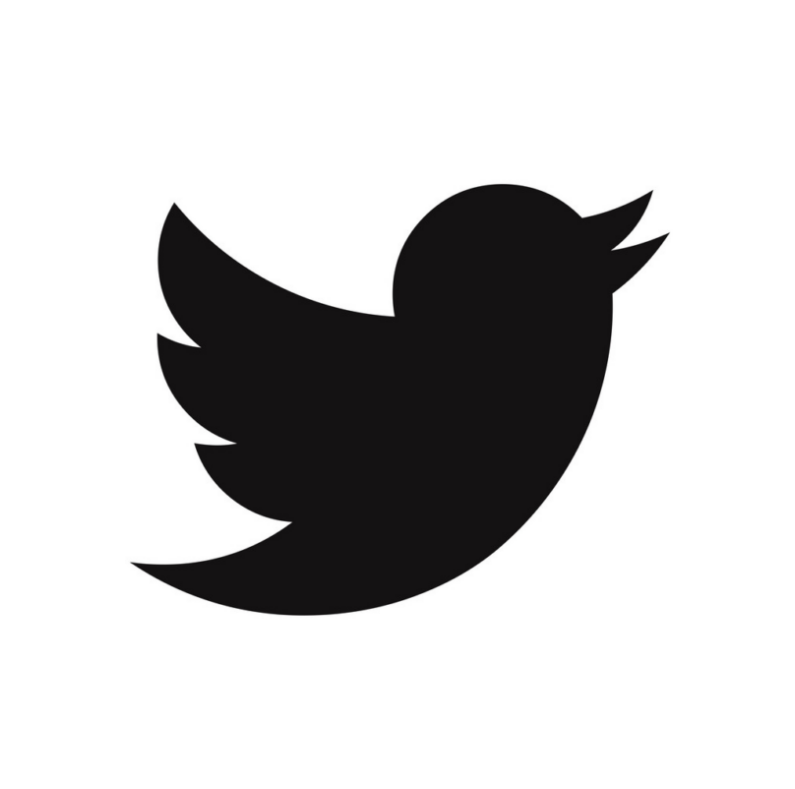

In [14]:
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))
    
fig = plt.figure() 
fig.set_figwidth(14) 
fig.set_figheight(18) 

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') 
plt.axis('off') 
plt.show() 

In [15]:
# Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

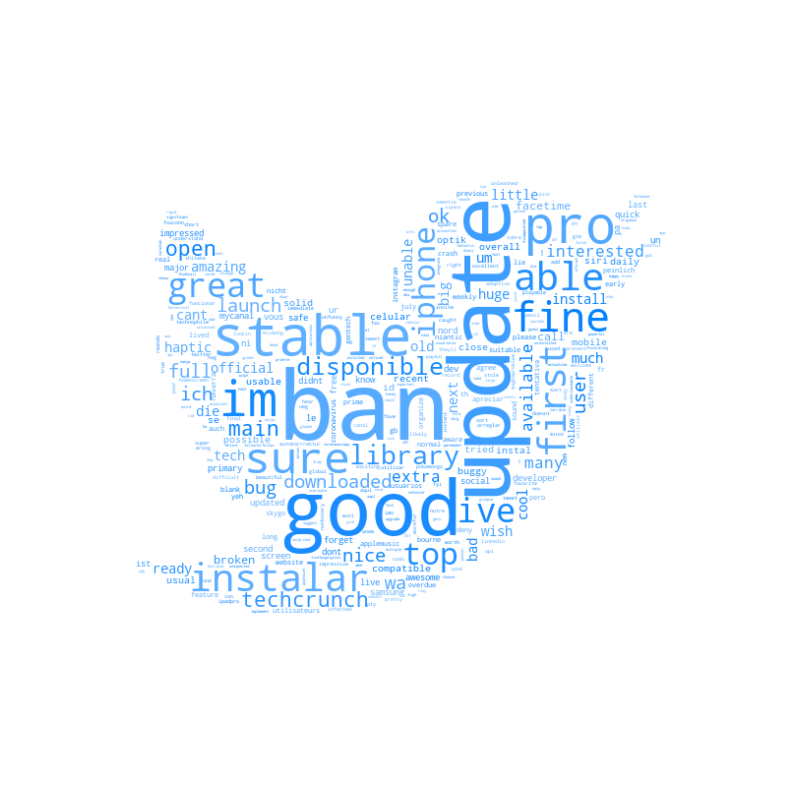

In [16]:
# Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

twitter_wc.generate(tweets_long_string)

fig = plt.figure()
fig.set_figwidth(14)  
fig.set_figheight(18)  

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()


In [17]:
# Combine all words into a list
tweets_long_string = df['Tweets_Adjectives'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [18]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
df1 = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df1.columns = ['Words', 'Count']
df1.sort_values(by='Count', ascending=False, inplace=True)

In [19]:
df1.head(10)

,Words,Count
12,ban,175
11,pro,51
62,top,45
81,update,23
13,techcrunch,19
53,good,18
45,stable,15
31,instalar,13
50,im,12
0,fine,9


In [20]:
# See quick results of the Sentiment Analysis
df['sentiment'].value_counts()

Negative    281
Positive    260
Name: sentiment, dtype: int64

In [21]:
# Create dataframe for Count of Sentiment Categories
bar_chart = df['sentiment'].value_counts().rename_axis('sentiment').to_frame('Total Tweets').reset_index()


In [22]:
bar_chart

,sentiment,Total Tweets
0,Negative,281
1,Positive,260


In [27]:
bar_chart.iplot(kind = 'bar', x = 'sentiment', y = 'Total Tweets',
                title = 'Number of positive/negative tweets for iOS14' ,color = 'tomato')